In [1]:
from datasets import SimplifiedFHBHandsDataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from PIL import Image

In [35]:
links = [
    (0, 1), (1, 2), (2, 3), (3, 4),     # 大拇指
    (0, 5), (5, 6), (6, 7), (7, 8),     # 食指
    (0, 9), (9, 10), (10, 11), (11, 12), # 中指
    (0, 13), (13, 14), (14, 15), (15, 16), # 无名指
    (0, 17), (17, 18), (18, 19), (19, 20)  # 小拇指
]

def visualize_joints_with_skeleton(image, joints2d, links, joints25d=None):
    fig, ax = plt.subplots(1, figsize=(8, 8))
    
    # 显示图片
    ax.imshow(image)

    # 绘制2D关节点 (红色)
    # ax.scatter(joints2d[:, 0], joints2d[:, 1], c='r', label='2D Joints')

    # 绘制关节点之间的连线 (骨架)
    for link in links:
        start, end = link
        ax.plot([joints2d[start, 0], joints2d[end, 0]], 
                [joints2d[start, 1], joints2d[end, 1]], 'r-')

    # 如果有2.5D坐标，也绘制深度信息 (蓝色)
    if joints25d is not None:
        # 将 z 轴深度值映射为颜色 (从浅蓝到深蓝)
        depths = joints25d[:, 2]
        depth_colors = (depths - depths.min()) / (depths.max() - depths.min())  # 归一化
        ax.scatter(joints25d[:, 0], joints25d[:, 1], c=depth_colors, cmap='Blues', label='2.5D Joints')

    # 设置图例
    ax.legend()
    ax.set_title("2D and 2.5D Joints with Skeleton Visualization")
    plt.show()

In [3]:
dataset_root = "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB"
dataset = SimplifiedFHBHandsDataset(dataset_folder=dataset_root, split='train')

# 获取第一个样本
print(len(dataset))
sample = dataset[0]


subj:  17%|█▋        | 1/6 [00:00<00:00,  9.47it/s]/media/mldadmin/home/s123mdg31_07/Projects/simpleHand/datasets/FPHAB.py:123: UserWarning: loadtxt: input contained no data: "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Hand_pose_annotation_v1/Subject_4/flip_sponge/2/skeleton.txt"
  skeleton_vals = np.loadtxt(skeleton_path)
subj:  67%|██████▋   | 4/6 [00:00<00:00,  9.20it/s]/media/mldadmin/home/s123mdg31_07/Projects/simpleHand/datasets/FPHAB.py:123: UserWarning: loadtxt: input contained no data: "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Hand_pose_annotation_v1/Subject_2/close_milk/4/skeleton.txt"
  skeleton_vals = np.loadtxt(skeleton_path)
/media/mldadmin/home/s123mdg31_07/Projects/simpleHand/datasets/FPHAB.py:123: UserWarning: loadtxt: input contained no data: "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Hand_pose_annotation_v1/Subject_2/put_tea_bag/2/skeleton.txt"
  skeleton_vals = np.loadtxt(skeleton_path)
subj: 100%|██████████| 6/6 [00:00<00:00,  8.64it/s]


Train samples: 52324
Test samples: 53135
52324


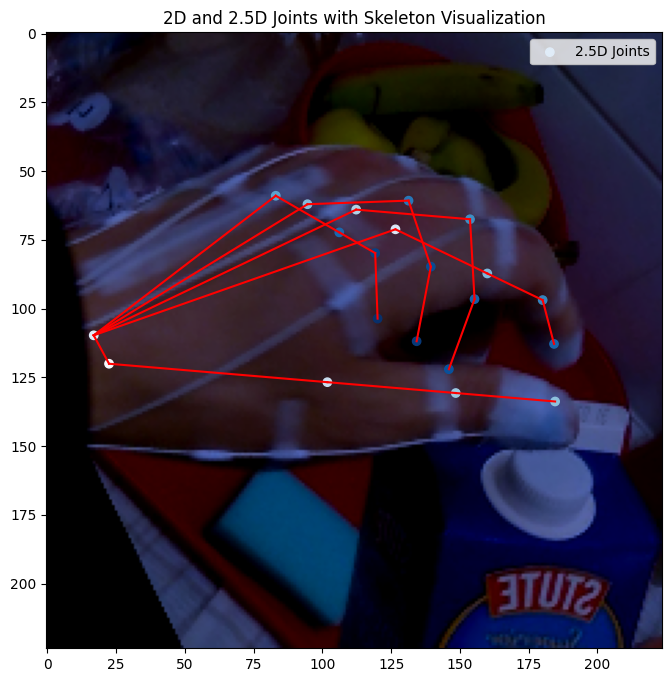

In [36]:
img = sample['img'] # 3, 224, 224

# visualiza img
img = np.transpose(img, (1, 2, 0))
import cv2
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

joints2d_normalized = sample['uv'] # 21, 2
joints2d = joints2d_normalized * 224
joints25d = sample['joints25d'] # 21, 3
joints3d = sample['xyz'] # 21, 3

visualize_joints_with_skeleton(img, joints2d, links, joints25d)


In [4]:
dataset_val = SimplifiedFHBHandsDataset(dataset_folder=dataset_root, split='train')
print(len(dataset_val))

subj: 100%|██████████| 6/6 [00:00<00:00,  8.86it/s]


Train samples: 52324
Test samples: 53135
52324


In [5]:
# 调用可视化函数，显示第一个样本的2D和2.5D关节点以及连接的骨架
visualize_joints_with_skeleton(image, joints2d, links)

NameError: name 'image' is not defined